In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
data["date_added"]=pd.to_datetime(data["date_added"],errors="coerce")

In [9]:
data["director"]=data["director"].fillna("No_director")
data["cast"]=data["cast"].fillna("NO_cast")
data["country"]=data["country"].fillna(data["country"].mode()[0])

In [10]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NO_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No_director,NO_cast,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No_director,NO_cast,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
data["date_added"]=data["date_added"].fillna(data["date_added"].mode()[0])

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# EDA

Text(0.5, 1.0, 'Type of content types')

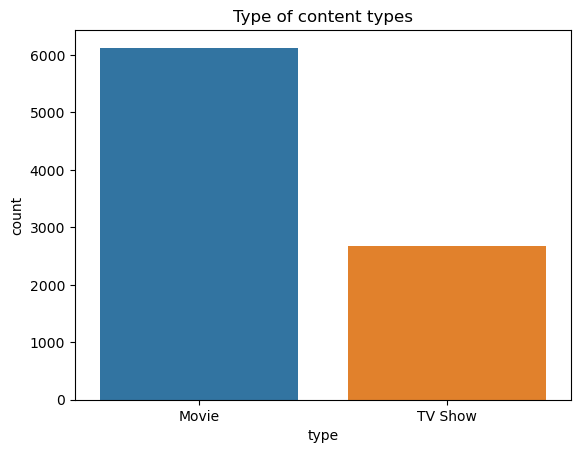

In [14]:
sns.countplot(x="type",data=data)
plt.title("Type of content types")

Text(0.5, 1.0, 'Top countries')

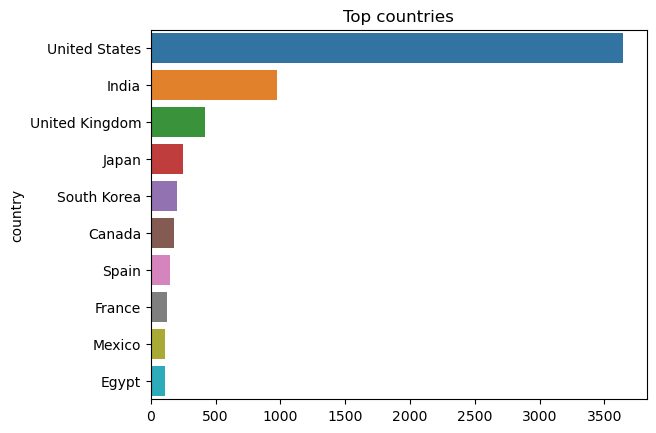

In [15]:
Top_countries =data["country"].value_counts().head(10)
sns.barplot(x=Top_countries.values,y=Top_countries.index)
plt.title("Top countries")

In [16]:
data["country"].value_counts().head(25)

country
United States                    3645
India                             972
United Kingdom                    419
Japan                             244
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          86
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
China                              66
Thailand                           61
Argentina                          56
Hong Kong                          53
United States, United Kingdom      47
Name: count, dtype: int64

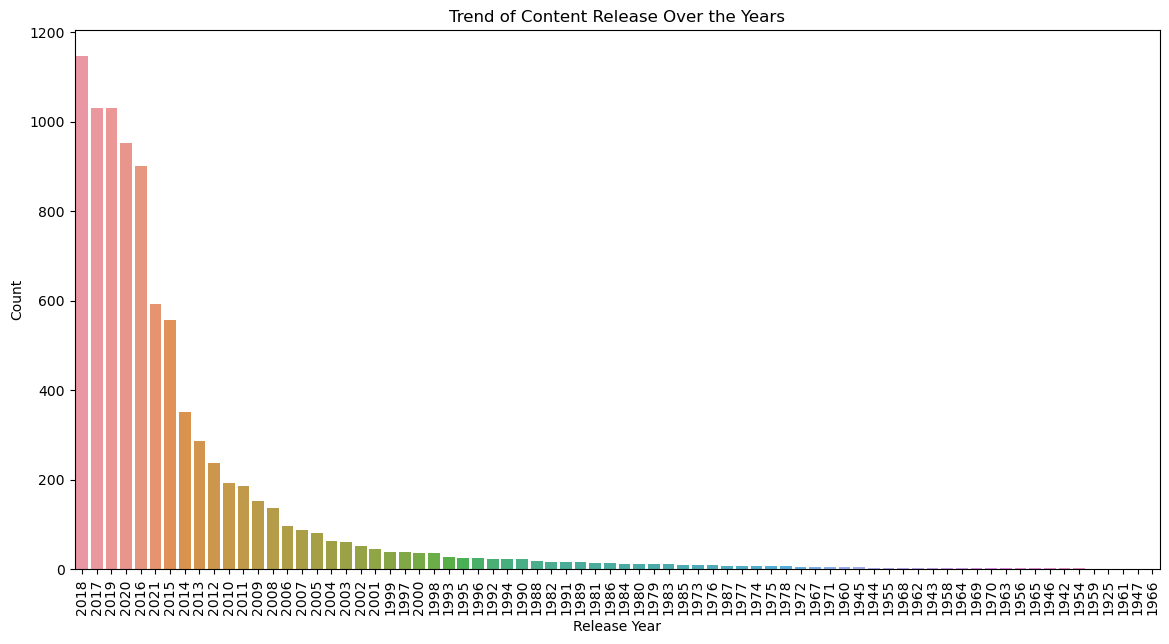

In [17]:
plt.figure(figsize=(14, 7))
sns.countplot(x='release_year', data=data, order=data['release_year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Trend of Content Release Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Top ratings')

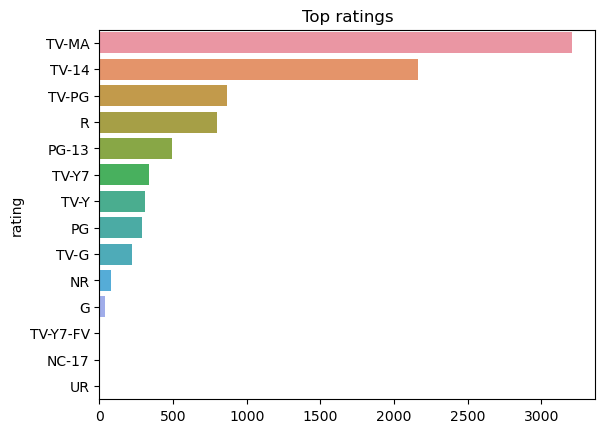

In [18]:
Top_ratings = data["rating"].value_counts().head(19)
sns.barplot(x=Top_ratings.values,y=Top_ratings.index)
plt.title("Top ratings")

In [19]:
data["director"].value_counts().head(15)

director
No_director               2631
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Steven Spielberg            11
Don Michael Paul            10
David Dhawan                 9
Hakan Algül                  8
Fernando Ayllón              8
Name: count, dtype: int64

In [20]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NO_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No_director,NO_cast,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
titles_by_type_country = data.groupby(['type', 'country']).size().unstack().fillna(0)
titles_by_type_country

country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
type,,,,,,,,,,,,,,,,,,,,,
Movie,1.0,0.0,38.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0
TV Show,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model development

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [23]:
label_encoders=[]
for column in ["type","director","cast","country","rating","duration","listed_in"]:
    le = LabelEncoder()
    data[column]=le.fit_transform(data[column])
    #label_encoders[column] =le

In [24]:
le

LabelEncoder()

In [25]:
x=data[["director","cast","country","rating","duration","listed_in"]]
y=data["type"]

# feature_importances_

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x,y)
print(gb.feature_importances_)

[1.77160166e-01 6.65112024e-04 3.35513421e-15 2.90392872e-04
 6.99024914e-01 1.22859416e-01]


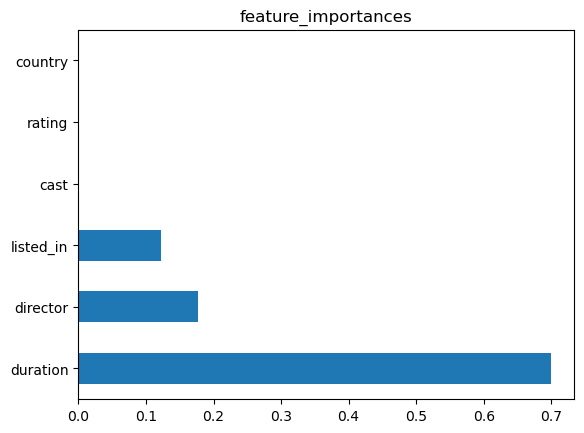

In [42]:
vis = pd.Series(gb.feature_importances_,index=x.columns)
vis.nlargest(20).plot(kind='barh')
plt.title("feature_importances")
plt.show()

In [26]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

# Scaling

In [27]:
ss=StandardScaler()
x_train_sc=ss.fit_transform(x_train)
x_test_sc = ss.transform(x_test)

# logistic regression 

In [28]:
lr =LogisticRegression()
lr.fit(x_train,y_train)
y_pre =lr.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_pre))


accuracy_score: 0.8113636363636364


In [29]:
lr =LogisticRegression(random_state=42)
lr.fit(x_train_sc,y_train)
y_pre_sc =lr.predict(x_test_sc)
print("accuracy_score:",accuracy_score(y_test,y_pre_sc))


accuracy_score: 0.8102272727272727


In [30]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1825
           1       0.72      0.63      0.67       815

    accuracy                           0.81      2640
   macro avg       0.78      0.76      0.77      2640
weighted avg       0.81      0.81      0.81      2640



# Random forest

In [31]:
Rc=RandomForestClassifier(random_state=42)
Rc.fit(x_train,y_train)
y_pred_rc = Rc.predict(x_test)
print("random_accuracy_score:",accuracy_score(y_test,y_pred_rc))

random_accuracy_score: 0.9916666666666667


In [32]:
Rc=RandomForestClassifier(random_state=42)
Rc.fit(x_train_sc,y_train)
y_pred_rc_sc = Rc.predict(x_test_sc)
print("random_accuracy_score:",accuracy_score(y_test,y_pred_rc_sc))

random_accuracy_score: 0.9916666666666667


In [33]:
print(classification_report(y_test,y_pred_rc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1825
           1       1.00      0.98      0.99       815

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640



# SVC

In [34]:
sc=SVC()
sc.fit(x_train,y_train)
y_pred_sc = sc.predict(x_test)
print("random_accuracy_score:",accuracy_score(y_test,y_pred_sc))

random_accuracy_score: 0.8424242424242424


In [35]:
sc=SVC()
sc.fit(x_train_sc,y_train)
y_pred_ss = sc.predict(x_test_sc)
print("random_accuracy_score:",accuracy_score(y_test,y_pred_ss))

random_accuracy_score: 0.9106060606060606


In [36]:
print(classification_report(y_test,y_pred_sc))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1825
           1       0.76      0.71      0.74       815

    accuracy                           0.84      2640
   macro avg       0.82      0.81      0.81      2640
weighted avg       0.84      0.84      0.84      2640



# Model selection 

In [37]:
print("accuracy_score:",accuracy_score(y_test,y_pre))
print("random_accuracy_score:",accuracy_score(y_test,y_pred_rc))
print("svm_accuracy_score:",accuracy_score(y_test,y_pred_sc))

accuracy_score: 0.8113636363636364
random_accuracy_score: 0.9916666666666667
svm_accuracy_score: 0.8424242424242424


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [0, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
grid_search = GridSearchCV(estimator=Rc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [49]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [0, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [50]:
best_params = grid_search.best_params_
print(f'Best parameters for Random Forest: {best_params}')

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
